# vinsight - Visualization Tutorial 1

in this notebook you will learn the intuition behind the features of the interpretability framework and how to us them.

## Gradient Class Activation Mapping (Grad-CAM) with ResNet

Demonstration of visualizing the class activation mapping for an image classification example.

### Step 1: Load pretrained model

In our example we use a pretrained ResNet for demonstration.


In [22]:
%matplotlib inline  
%load_ext autoreload
%autoreload 2  
%cd ../src

import data_utils
from data_utils import DataConfig
from vinsight.visualization import methods
from vinsight.visualization import interface
from PIL import Image

import torch
from torch import Tensor
from torch.nn import Softmax

from torchvision import models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/christina/Development/interpretability-framework/src


In [23]:
model = models.resnet50(pretrained=True)

model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

## Load Image

In [32]:
img_path = "../data/imagenet_example_283.jpg"
input_ = data_utils.get_example_from_path(img_path, DataConfig.ALEX_NET)

1) dimensionality split - select layersplit

2) compute a forward pass to retrieve features (input)

3) compute forward pass through layer of choice to retrieve output


## select layer of interest

in ResNet, we have 9 layers, where 8 is the last feature layer and 10 the classification layer

**Note: please choose a layer between 0 and 8** #TODO method: check if choice is valid

In [33]:
selected_layer = 8

## select class of interest
in this example we use the topk classes and compute their saliency maps

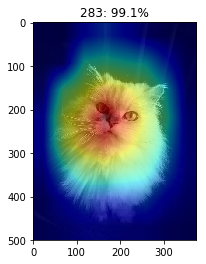

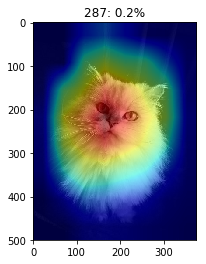

In [36]:
output_scores, output_classes = torch.topk(Softmax(dim=1)(model(input_)), 2)
img = Image.open(img_path)

top_layers, bottom_layers, bottom_split = interface.ModelSplit().get_split(model, selected_layer)

for i, (score, c) in enumerate(zip(output_scores[0], output_classes[0])):
    saliency_map = methods.SaliencyMap(top_layers, bottom_layers, bottom_split).visualize(c, input_)
    methods.plot_saliency(saliency_map, img, c, score, selected_layer)